In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('game_details_with_counts.csv')

# Displaying the first few rows to understand the structure of the data
data.head()


,name,year_published,min_players,max_players,min_playtime,max_playtime,min_age,categories,mechanics,users_rated,average_rating,weight,category_count,mechanic_count
0,CATAN,1995,3,4,60,120,10,"['Economic', 'Negotiation']","['Chaining', 'Dice Rolling', 'Hexagon Grid', '...",129246,7.09753,2.2909,2,11
1,Carcassonne,2000,2,5,30,45,7,"['Medieval', 'Territory Building']","['Area Majority / Influence', 'Enclosure', 'Ma...",128379,7.41021,1.8921,2,5
2,Pandemic,2008,2,4,45,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...",126656,7.53305,2.3994,1,7
3,7 Wonders,2010,2,7,30,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Closed Drafting', 'Hand Management', 'Neighb...",105584,7.68019,2.3173,5,6
4,Terraforming Mars,2016,1,5,120,120,12,"['Economic', 'Environmental', 'Industry / Manu...","['Closed Drafting', 'Contracts', 'End Game Bon...",100639,8.35596,3.2630,6,16


In [11]:
# Creating a binary label for high ratings
data['high_rating'] = (data['average_rating'] >= 7.5).astype(int)

# Selecting features and target variable
features = ['weight', 'min_age', 'max_players', 'min_playtime', 'category_count', 'mechanic_count']
X = data[features]  # Features (input variables)
y = data['high_rating']  # Target (output variable)

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Initializing the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_model.predict(X_test)


In [13]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Printting results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8244444444444444
Confusion Matrix:
[[555  57]
 [101 187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       612
           1       0.77      0.65      0.70       288

    accuracy                           0.82       900
   macro avg       0.81      0.78      0.79       900
weighted avg       0.82      0.82      0.82       900



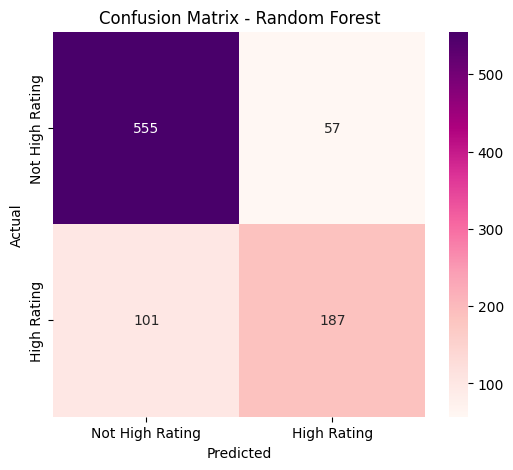

In [14]:
# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu", xticklabels=["Not High Rating", "High Rating"], yticklabels=["Not High Rating", "High Rating"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_random_forest.png")
plt.show()
